In [ ]:
!pip install random2

In [ ]:
#normal training data extraction from .nii files
#leavinng all the black slides and corping the images
#only non black ot slides are considered
#each image dimension 192 x 192 and saved as .jpg format in grayscale


import os
import nibabel as nib
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random2

data_dict = {
    "Flair" : "flair",
    "T1" : "t1",
    "T2" : "t2",
    "DWI" : "dwi",
    "OT" : 'ot'
}
#data_types = ["Flair"]
data_types = ["OT"]

dir_path = r"C:\Users\srivi\Downloads\New folder (16)\ISLES Challenge 2015\SISS2015_Training"

folders = []
for i in range(1,29):
    folders.append(str(i))

prefix = ["%.2d" % i for i in range(1,100)]
imgNum = ["%.3d" % i for i in range(0,999999)]

upper_black_slide = 0
lower_black_slide = 0
new_subject = True
blank_slide_list = []

print("Saving Flair Images....")
img_name = []

c=-1
for folder in tqdm(folders):
    c+=1
    flairImg=0
    validIndex = []
    new_subject_list = []
    upper_black_slide = 0
    lower_black_slide = 0
    new_subject = True
    sub_folders = os.listdir(os.path.join(dir_path,folder))
    for sub_folder in sub_folders:
        file_names = os.listdir(os.path.join(dir_path,folder,sub_folder))
        for each_file in file_names:
            if ".nii" in each_file:
                data = nib.load(os.path.join(dir_path,folder,sub_folder,each_file))
                data = data.get_fdata().T
                if data_types[0] in each_file:
                    for i in range(data.shape[0]):
                        temp = np.sum(data[i])
                        if temp!=0:
                            new_subject = False
                            #name = str("./data/normal_data/training/mask/"+prefix[c]+"_"+imgNum[flairImg]+".jpg")
                            #name = str("./full_data/normal_data/training/mask/"+prefix[c]+"_"+imgNum[flairImg]+".jpg")
                            name = str("./full_data/normal_data/training/flair/"+prefix[c]+"_"+imgNum[flairImg]+".jpg")
                            ss = [str(prefix[c]+"_"+imgNum[flairImg]+".jpg")]
                            img_name.append(ss)
                            flairImg+=1
                            img = data[i]
                            img = img[19:211,19:211]
                            plt.imsave(name,img,cmap='gray')
                        else :
                            if new_subject :
                                upper_black_slide+=1
                            else:
                                lower_black_slide+=1
    new_subject_list.append(upper_black_slide)
    new_subject_list.append(lower_black_slide)
    blank_slide_list.append(new_subject_list)

np.save("./full_data/normal_data/training/imageNames",img_name)
#other data extract

for key in data_dict:
    print("Saving {} Images....".format(key))
    c=-1
    count = 0
    raw_data = []
    p = 0
    for folder in tqdm(folders):
        c+=1
        p+=1
        count=0
        sub_folders = os.listdir(os.path.join(dir_path,folder))
        for sub_folder in sub_folders:
            file_names = os.listdir(os.path.join(dir_path,folder,sub_folder))
            for each_file in file_names:
                if ".nii" in each_file:
                    data = nib.load(os.path.join(dir_path,folder,sub_folder,each_file))
                    data = data.get_fdata().T
                    if key in each_file:
                        for i in range(blank_slide_list[p-1][0],data.shape[0]-blank_slide_list[p-1][1]):
                            #name = str("./data/normal_data/training/"+str(key)+"/"+prefix[c]+"_"+imgNum[count]+".jpg")
                            name = str("./full_data/normal_data/training/"+str(key)+"/"+prefix[c]+"_"+imgNum[count]+".jpg")
                            img = data[i]
                            img = img[19:211,19:211]
                            plt.imsave(name,img,cmap='gray')
                            count+=1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import random

ign = np.load(r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\imageNames.npy')
imagenames = []
for i in range(ign.shape[0]):
    imagenames.append(ign[i][0])

random.shuffle(imagenames)
print('total images={}'.format(len(imagenames)))
split = int(len(imagenames)*0.8)

trainImageNames = imagenames[:split]
validImageNames = imagenames[split:]
print('training images={}'.format(len(trainImageNames)))
print('validation images={}'.format(len(validImageNames)))

print(trainImageNames[:5])
print(validImageNames[:5])

#augmented image from one image
ifi = 7

data_gen_args = dict(
                    rescale=1.0/255,
                    rotation_range=30,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range=0.2,
                    zoom_range=0.1)

def trainset(b_size):
    print('creating augmented training images...')
    seed = 1337
    image_datagen = ImageDataGenerator(**data_gen_args)
    mask_datagen = ImageDataGenerator(**data_gen_args)

    save_here_img = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\augmented_data\training\image'
    save_here_mask = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\augmented_data\training\mask'

    k=0
    for i in range(len(trainImageNames)):
        normalimgPath = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\t1\{}'.format(trainImageNames[i])
        normalmaskPath = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\ot\{}'.format(trainImageNames[i])
        img = np.expand_dims(plt.imread(normalimgPath),0)
        mask = np.expand_dims(plt.imread(normalmaskPath),0)
        for x, y, val in zip(image_datagen.flow(img,batch_size=b_size,seed=seed,save_to_dir=save_here_img,save_prefix='aug_{}'.format(str(k)),save_format='jpg'),
                            mask_datagen.flow(mask,batch_size=b_size,seed=seed,save_to_dir=save_here_mask,save_prefix='aug_{}'.format(str(k)),save_format='jpg'),
                            range(ifi)) :
            #yield(x,y)
            k+=1

def validset(b_size):
    print('creating augmented validation images...')
    seed = 1243
    image_datagen = ImageDataGenerator(**data_gen_args)
    mask_datagen = ImageDataGenerator(**data_gen_args)

    save_here_img = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\augmented_data\validation\image'
    save_here_mask = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\augmented_data\validation\mask'

    k=0
    for i in range(len(validImageNames)):
        normalimgPath = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\t1\{}'.format(trainImageNames[i])
        normalmaskPath = r'C:\Users\srivi\Downloads\New folder (16)\ISCHEMIC-STROKE-LESION-SEGMENTATION-BY-DEEP-LEARNING-ISLES-2015-master\SISS\full_data\normal_data\training\dataset2\ot\{}'.format(trainImageNames[i])
        img = np.expand_dims(plt.imread(normalimgPath),0)
        mask = np.expand_dims(plt.imread(normalmaskPath),0)
        for x, y, val in zip(image_datagen.flow(img,batch_size=b_size,seed=seed,save_to_dir=save_here_img,save_prefix='aug_{}'.format(str(k)),save_format='jpg'),
                            mask_datagen.flow(mask,batch_size=b_size,seed=seed,save_to_dir=save_here_mask,save_prefix='aug_{}'.format(str(k)),save_format='jpg'),
                            range(ifi)) :
            #yield(x,y)
            k+=1


trainset(3)
validset(3)

In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow==2.12.0

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [2]:
import os
import math
import nibabel
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.python.keras.utils.data_utils import Sequence
import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K

from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
#content/
num_train_examples = len(os.listdir(r'/content/gdrive/MyDrive/dataset2/augmented_data/training/mask'))
num_val_examples = len(os.listdir(r'/content/gdrive/MyDrive/dataset2/augmented_data/validation/mask'))

print("Number of training examples: {}".format(num_train_examples))
print("Number of validation examples: {}".format(num_val_examples))

Number of training examples: 8672
Number of validation examples: 2176


In [5]:
img_shape = (192, 192, 3)
batch_size = 15
epochs = 5

In [6]:
from tensorflow.keras.layers import BatchNormalization

In [7]:
def conv_block(inputs, filters):
    conv11 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    bn11 = BatchNormalization(axis=3)(conv11)
    a11 = layers.Activation("relu")(bn11)

    #filters-line-conv=2
    conv21 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    bn21 = BatchNormalization(axis=3)(conv21)
    a21 = layers.Activation("relu")(bn21)
    conv22 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(a21)
    bn22 = BatchNormalization(axis=3)(conv22)
    a22 = layers.Activation("relu")(bn22)

    #filters-line-conv=3
    conv31 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    bn31 = BatchNormalization(axis=3)(conv31)
    a31 = layers.Activation("relu")(bn31)
    conv32 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(a31)
    bn32 = BatchNormalization(axis=3)(conv32)
    a32 = layers.Activation("relu")(bn32)
    conv33 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(a32)
    bn33 = BatchNormalization(axis=3)(conv33)
    a33 = layers.Activation("relu")(bn33)

    resout = layers.concatenate([a11,a22,a33,inputs])
    resout = layers.Activation("relu")(resout)

    return resout

def encoder_block(input_tensor, num_filters):
    encoder = conv_block(input_tensor, num_filters)
    pool = layers.MaxPooling2D((2, 2), strides=(2, 2))(encoder)

    return pool, encoder

def upconv_block(lower_input,higher_input,filters):
    transpose = layers.Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(lower_input)
    upconv_concat = layers.concatenate([higher_input, transpose], axis=-1)
    return upconv_concat

def decoder_block(inputs, concat_tensor, filters):
    decoder = layers.Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(inputs)
    decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
    decoder = BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)

    conv11 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(decoder)
    bn11 = BatchNormalization(axis=3)(conv11)
    a11 = layers.Activation("relu")(bn11)

    #filters-line-conv=2
    conv21 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(decoder)
    bn21 = BatchNormalization(axis=3)(conv21)
    a21 = layers.Activation("relu")(bn21)
    conv22 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(a21)
    bn22 = BatchNormalization(axis=3)(conv22)
    a22 = layers.Activation("relu")(bn22)

    #filters-line-conv=3
    conv31 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(decoder)
    bn31 = BatchNormalization(axis=3)(conv31)
    a31 = layers.Activation("relu")(bn31)
    conv32 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(a31)
    bn32 = BatchNormalization(axis=3)(conv32)
    a32 = layers.Activation("relu")(bn32)
    conv33 = layers.Conv2D(filters, 3, padding = 'same', kernel_initializer = 'he_normal')(a32)
    bn33 = BatchNormalization(axis=3)(conv33)
    a33 = layers.Activation("relu")(bn33)


    resout = layers.concatenate([a11,a22,a33,decoder])
    resout = layers.Activation("relu")(resout)

    return resout

In [8]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

def bce_dice_loss(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

def specificity(y_true, y_pred):
  neg_y_true = 1 - y_true
  neg_y_pred = 1 - y_pred
  fp = K.sum(neg_y_true * y_pred)
  tn = K.sum(neg_y_true * neg_y_pred)
  specificity = tn / (tn + fp + K.epsilon())
  return specificity

def dsc(y_true, y_pred):
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    tp = K.sum(y_true * y_pred)
    fn = K.sum(y_true * neg_y_pred)
    fp = K.sum(neg_y_true * y_pred)
    dsc = (2*tp) / ((2*tp) + fn + fp + K.epsilon())
    return dsc

def sensitivity(y_true, y_pred):
  neg_y_true = 1 - y_true
  neg_y_pred = 1 - y_pred
  tp = K.sum(y_true * y_pred)
  fn = K.sum(y_true * neg_y_pred)
  sensitivity = tp / (tp + fn + K.epsilon())
  return sensitivity

def sce(y_true, y_pred):
    loss = tf.losses.sigmoid_cross_entropy(y_true, y_pred)
    return loss

def bce(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred)
    return loss

In [9]:
#initial filter number
ifn=16

In [10]:
#initial filter number
ifn=16
inputs = layers.Input(shape=img_shape)
# 256

encoder0_pool, encoder0 = encoder_block(inputs, ifn)
# 128

encoder1_pool, encoder1 = encoder_block(encoder0_pool, 2*ifn)
upconv_concat1 = upconv_block(encoder1,encoder0,ifn)
# 64

encoder2_pool, encoder2 = encoder_block(encoder1_pool, 4*ifn)
upconv_concat2 = upconv_block(encoder2,encoder1,2*ifn)
# 32

encoder3_pool, encoder3 = encoder_block(encoder2_pool, 8*ifn)
upconv_concat3 = upconv_block(encoder3,encoder2,4*ifn)
# 16

encoder4_pool, encoder4 = encoder_block(encoder3_pool, 16*ifn)
upconv_concat4 = upconv_block(encoder4,encoder3,8*ifn)
# 8

center = conv_block(encoder4_pool, 32*ifn)
# center

decoder4 = decoder_block(center, encoder4, 16*ifn)
# 16

decoder3 = decoder_block(decoder4, upconv_concat4, 8*ifn)
# 32

decoder2 = decoder_block(decoder3, upconv_concat3, 4*ifn)
# 64

decoder1 = decoder_block(decoder2, upconv_concat2, 2*ifn)
# 128

decoder0 = decoder_block(decoder1, upconv_concat1, ifn)
# 256

outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(decoder0)

model = models.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_loss,dsc,sensitivity,specificity,'accuracy'])
#model.summary()

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization/gamma:0' shape=(16,) dtype=float32>
  <tf.Variable 'batch_normalization/beta:0' shape=(16,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm_1), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization_1/gamma:0' shape=(16,) dtype=float32>
  <tf.Variable 'batch_normalization_1/beta:0' shape=(16,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda

In [11]:
#model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_loss,dsc,sensitivity,specificity,'accuracy'])
#model.compile(optimizer='adam', loss=sce, metrics=[dice_loss,dsc,sensitivity,specificity,'accuracy'])

#model.summary()

In [12]:
def trainset(b_size):
    seed = 1337
    image_datagen = ImageDataGenerator(rescale=1.0/255)
    mask_datagen = ImageDataGenerator(rescale=1.0/255)

    image = image_datagen.flow_from_directory(
        r"/content/gdrive/MyDrive/dataset2/augmented_data/training",  # Direct path to images
        classes = ["image"],
        shuffle=True,
        class_mode=None,
        target_size = (192,192),
        batch_size = b_size,
        seed=seed
    )


    mask = mask_datagen.flow_from_directory(
        r"/content/gdrive/MyDrive/dataset2/augmented_data/training",
        classes = ['mask'],
        shuffle=True,
        class_mode=None,
        color_mode = "grayscale",
        target_size = (192,192),
        batch_size = b_size,
        seed=seed
    )


    train_data_generator = zip(image,mask)

    for (image,mask) in train_data_generator:
        yield(image-0.5,mask)

train_set = trainset(batch_size)

In [13]:
def validset(b_size):
    seed = 1223
    image_datagen = ImageDataGenerator(rescale=1.0/255)
    mask_datagen = ImageDataGenerator(rescale=1.0/255)

    image = image_datagen.flow_from_directory(
        r"/content/gdrive/MyDrive/dataset2/augmented_data/validation",
        classes = ["image"],
        shuffle=True,
        class_mode=None,
        target_size = (192,192),
        batch_size = b_size,
        seed=seed
    )


    mask = mask_datagen.flow_from_directory(
        r"/content/gdrive/MyDrive/dataset2/augmented_data/validation",
        classes = ['mask'],
        shuffle=True,
        class_mode=None,
        color_mode = "grayscale",
        target_size = (192,192),
        batch_size = b_size,
        seed=seed
    )


    valid_data_generator = zip(image,mask)

    for (image,mask) in valid_data_generator:
        yield(image-0.5,mask)
valid_set = validset(batch_size)

In [14]:
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    return tf.keras.callbacks.LearningRateScheduler(schedule,verbose=1)
lr = step_decay_schedule(initial_lr=1e-4, decay_factor=0.2, step_size=2)

In [15]:
import os

def count_files(directory):
    """ Counts the number of files in a given directory. """
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# Directories to check
directories = [
    "/content/gdrive/MyDrive/dataset2/augmented_data/training/image",
    "/content/gdrive/MyDrive/dataset2/augmented_data/training/mask",
    "/content/gdrive/MyDrive/dataset2/augmented_data/validation/image",
    "/content/gdrive/MyDrive/dataset2/augmented_data/validation/mask"
]

# Counting and printing the number of files in each directory
for directory in directories:
    try:
        num_files = count_files(directory)
        print(f"Number of files in {directory}: {num_files}")
    except FileNotFoundError:
        print(f"Directory not found: {directory}")
    except PermissionError:
        print(f"Permission denied for directory: {directory}")

import os

file_path = "/content/gdrive/MyDrive/dataset2/augmented_data/training/image/aug_882_0_4486.jpg"

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file exists: {file_path}")
else:
    print(f"The file does not exist: {file_path}")


Number of files in /content/gdrive/MyDrive/dataset2/augmented_data/training/image: 8672
Number of files in /content/gdrive/MyDrive/dataset2/augmented_data/training/mask: 8672
Number of files in /content/gdrive/MyDrive/dataset2/augmented_data/validation/image: 2176
Number of files in /content/gdrive/MyDrive/dataset2/augmented_data/validation/mask: 2176
The file exists: /content/gdrive/MyDrive/dataset2/augmented_data/training/image/aug_882_0_4486.jpg


In [16]:
# Train the model without callbacks
history = model.fit(
    train_set,
    steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
    epochs=epochs,
    validation_data=valid_set,
    validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
    callbacks=[lr]
)


# First, save the weights only
model.save_weights('UNet_weights.h5')

Found 8672 images belonging to 1 classes.
Found 8672 images belonging to 1 classes.
Epoch 1/5

Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
579/579 [==============================] - ETA: 0s - loss: 0.6251 - dice_loss: 0.6244 - dsc: 0.3756 - sensitivity: 0.4719 - specificity: 0.9472 - accuracy: 0.9222Found 2176 images belonging to 1 classes.
Found 2176 images belonging to 1 classes.
579/579 [==============================] - 3921s 7s/step - loss: 0.6251 - dice_loss: 0.6244 - dsc: 0.3756 - sensitivity: 0.4719 - specificity: 0.9472 - accuracy: 0.9222 - val_loss: 0.5135 - val_dice_loss: 0.5163 - val_dsc: 0.4837 - val_sensitivity: 0.4006 - val_specificity: 0.9948 - val_accuracy: 0.9623
Epoch 2/5

Epoch 2: LearningRateScheduler setting learning rate to 0.0001.
579/579 [==============================] - 3372s 6s/step - loss: 0.4034 - dice_loss: 0.4042 - dsc: 0.5957 - sensitivity: 0.5851 - specificity: 0.9911 - accuracy: 0.9608 - val_loss: 0.4187 - val_dice_loss: 0.4224 - v

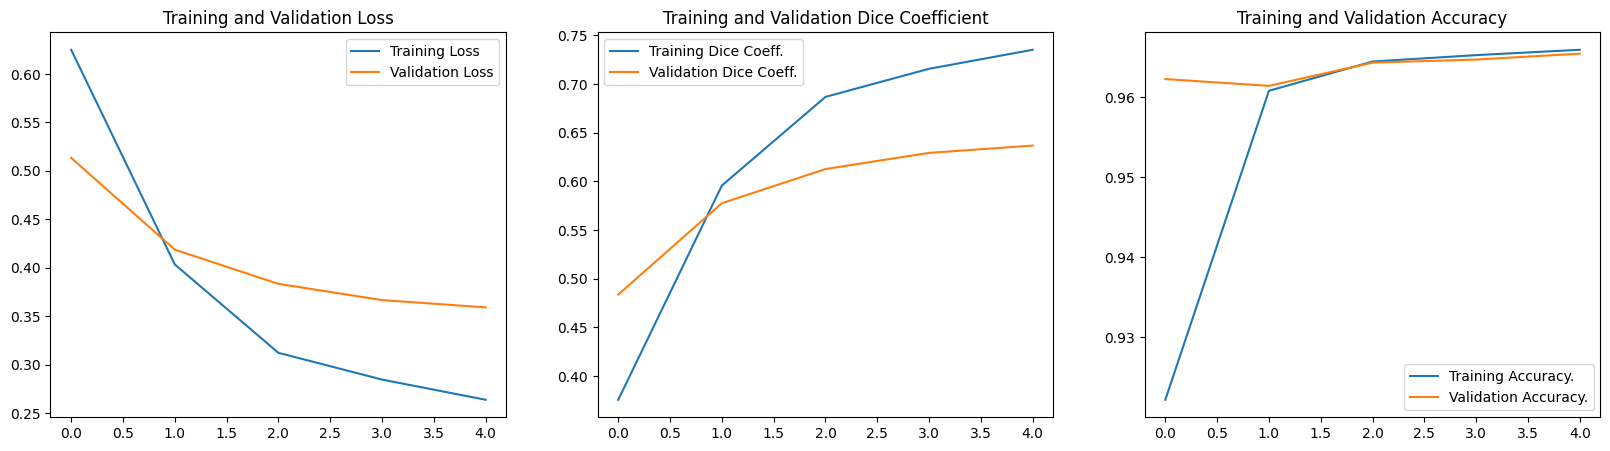

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

dice = history.history['dsc']
val_dice = history.history['val_dsc']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(5)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')

plt.subplot(1, 3, 2)
plt.plot(epochs_range, dice, label='Training Dice Coeff.')
plt.plot(epochs_range, val_dice, label='Validation Dice Coeff.')
plt.legend(loc='best')
plt.title('Training and Validation Dice Coefficient')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, acc, label='Training Accuracy.')
plt.plot(epochs_range, val_acc, label='Validation Accuracy.')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.show()


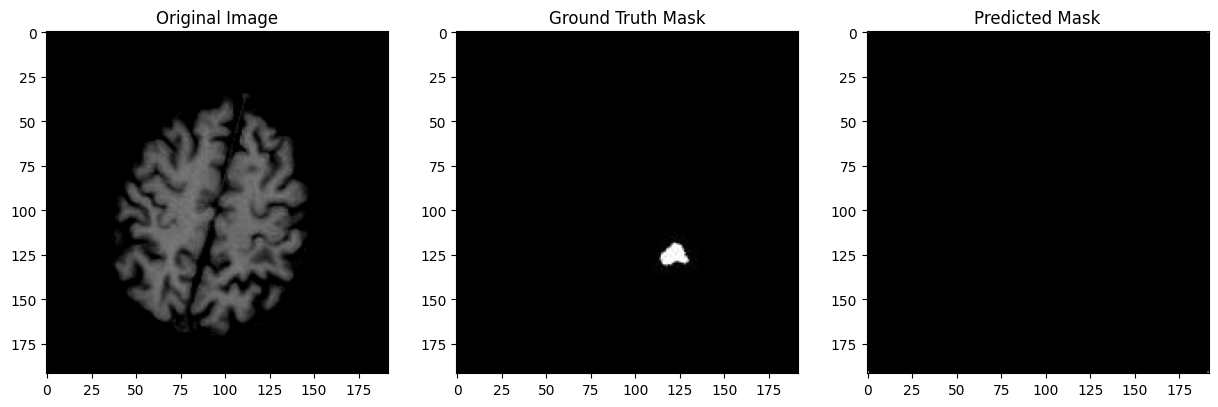

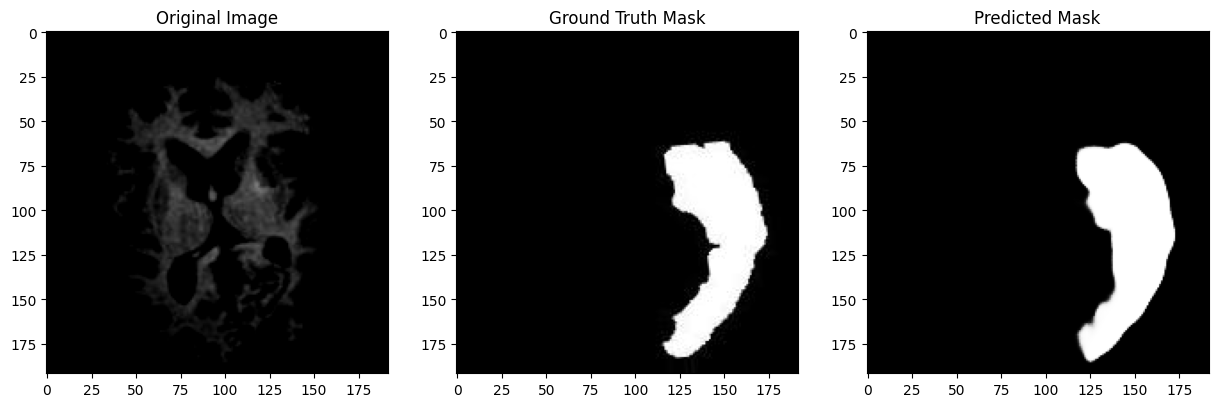

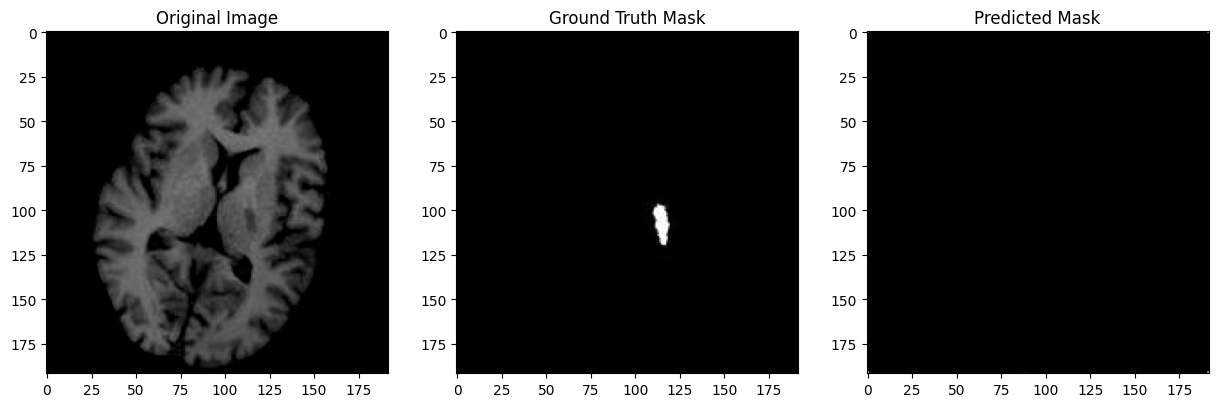

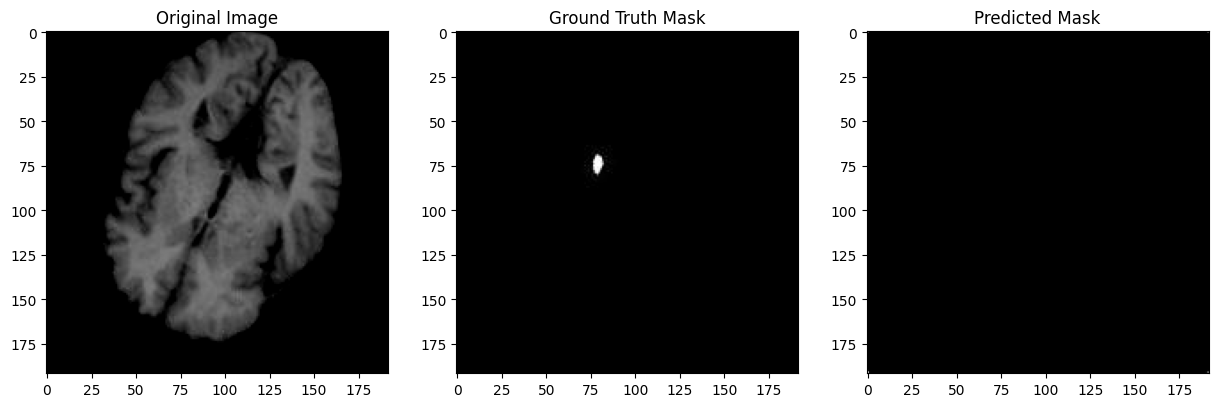

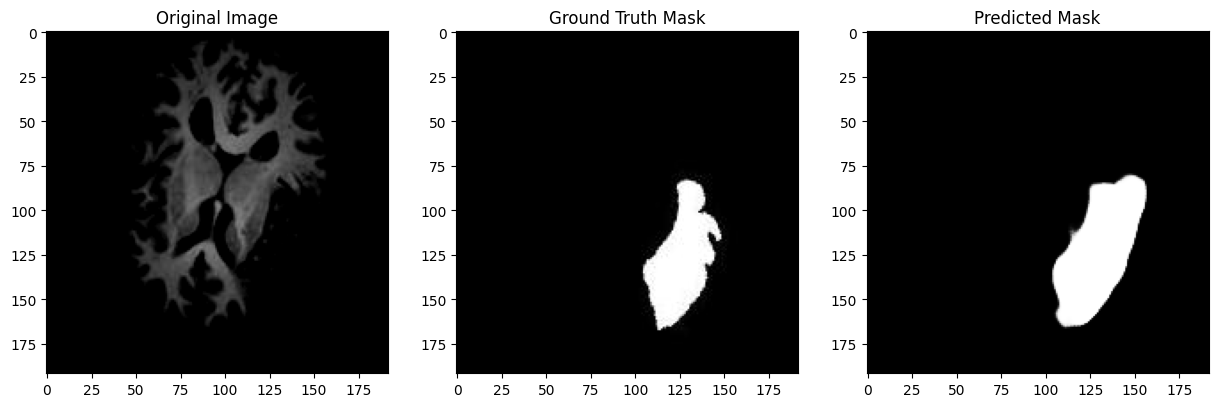

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Load the trained model
model.load_weights('UNet_weights.h5')

# Choose 5 random samples from your dataset
sample_indices = np.random.choice(1000, 5)  # Assuming you have 5 samples in each set

# Loop through the selected samples
for i, idx in enumerate(sample_indices):
    # Get a batch of data from the train_set and valid_set
    original_image, mask = next(train_set) if i < 3 else next(valid_set)

    # Predict the mask using the trained model
    predicted_mask = model.predict(original_image)[0]

    # Plot the original image, ground truth mask, and predicted mask
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image[0])  # Assuming original_image is in shape (batch_size, height, width, channels)
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(mask[0, :, :, 0], cmap='gray')  # Assuming mask is in shape (batch_size, height, width, 1)
    plt.title('Ground Truth Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask[:, :, 0], cmap='gray')  # Assuming predicted_mask is in shape (height, width, 1)
    plt.title('Predicted Mask')

    plt.show()